In [38]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import LineString, Point

In [39]:
def load_data(fname):
    df = pd.read_csv(fname)
    df['traj'] = json.loads('[' + df.coordinates.str.cat(sep=',') + ']')
    df = df[df.traj.str.len() > 1].copy()
    df['lines'] = gpd.GeoSeries(df.traj.apply(LineString))
    return gpd.GeoDataFrame(df, geometry='lines')

#skiprows is updated for each run of the code, to walk through the whole dataset (range(1, 100000), range(1, 200000), ....)
df = load_data('bus_routes-all-formatted.csv')
df.head()

,name,coordinates,traj,lines
0,bus-200-b-cq,"[[-8.6070635, 41.1518608], [-8.6069348, 41.150...","[[-8.6070635, 41.1518608], [-8.6069348, 41.150...","LINESTRING (-8.60706 41.15186, -8.60693 41.151..."
1,bus-200-cq-b,"[[-8.6890547, 41.1674564], [-8.6881585, 41.167...","[[-8.6890547, 41.1674564], [-8.6881585, 41.167...","LINESTRING (-8.68905 41.16746, -8.68816 41.167..."
2,bus-201-v-sdb,"[[-8.6422607, 41.1778454], [-8.6424906, 41.178...","[[-8.6422607, 41.1778454], [-8.6424906, 41.178...","LINESTRING (-8.64226 41.17785, -8.64249 41.178..."
3,bus-201-sdb-v,"[[-8.6094111, 41.1467959], [-8.6087245, 41.147...","[[-8.6094111, 41.1467959], [-8.6087245, 41.147...","LINESTRING (-8.60941 41.14680, -8.60872 41.147..."
4,bus-202-cq-l,"[[-8.6890547, 41.1674564], [-8.6881585, 41.167...","[[-8.6890547, 41.1674564], [-8.6881585, 41.167...","LINESTRING (-8.68905 41.16746, -8.68816 41.167..."


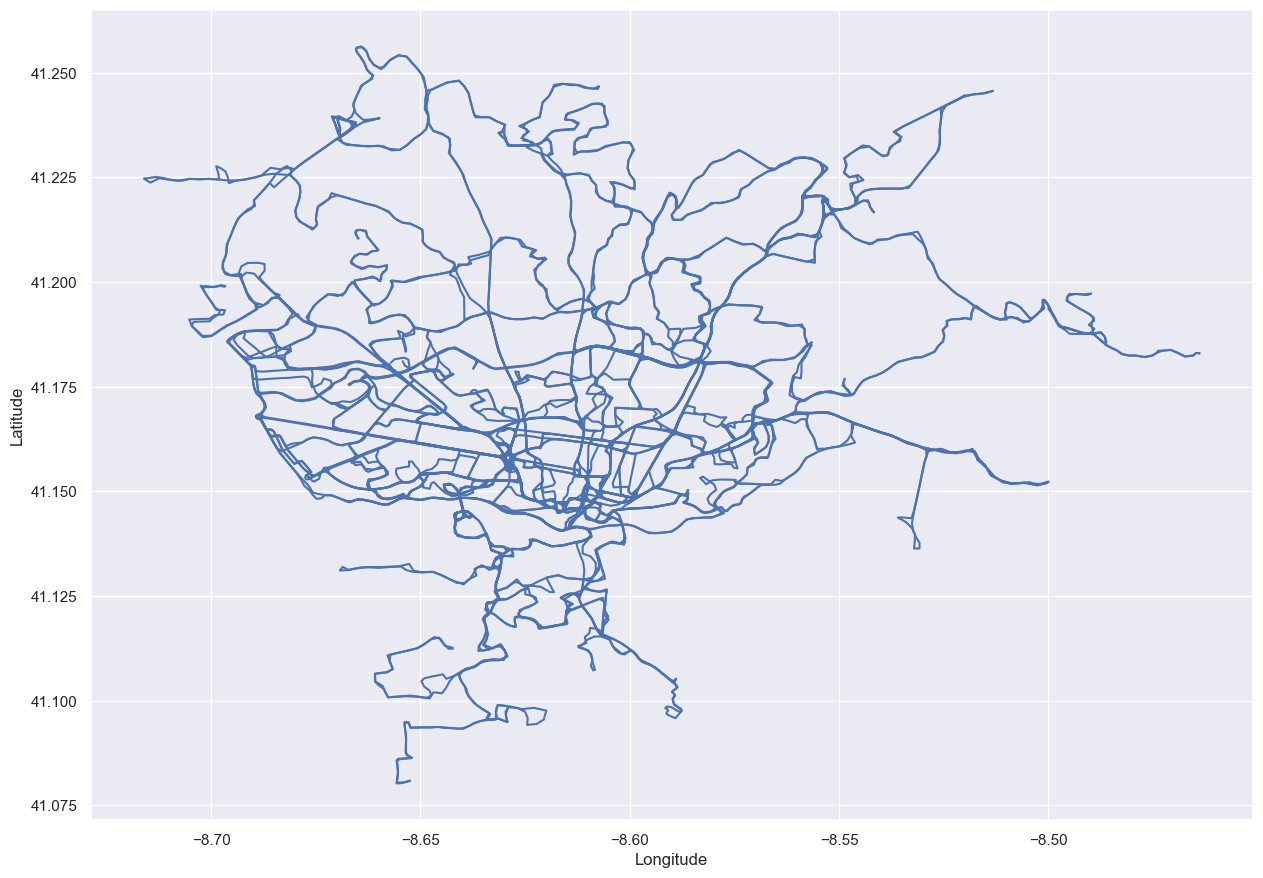

In [40]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,8]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

df.lines.plot(figsize=[15,15])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()